In [1]:
import os

In [19]:
# check current directory
os.getcwd()

'/Users/jessesnaust/Documents/python scripts'

In [84]:
# change directory
os.chdir('/Users/jessesnaust/Documents/python scripts')
os.getcwd()

'/Users/jessesnaust/Documents/python scripts'

In [35]:
# change directory
os.chdir('/Volumes/WD_1TB/')
os.getcwd()

'/Volumes/WD_1TB'

In [81]:
file_path = "Cellomics_images/102919-WT/not_blurry"

In [82]:
# testing indexing to find ID to match
sample_name = 'MFGTMP_191029100001_B01f05d0'
index = sample_name.find('_')
sample_name[index+1:]

'191029100001_B01f05d0'

## using list of file names to create an index, for finding files of other channels

In [22]:
ID_list = []
for entry in os.scandir(file_path):
    if entry.name.endswith('.TIF'):
        fName = entry.name
        index = fName.rfind('_')
        matchID = fName[index+1:-6]
        ID_list.append(matchID)

In [23]:
print(ID_list)

['B01f222', 'B01f245', 'B01f114', 'B01f124', 'B01f27', 'B01f150', 'B01f111', 'B01f294', 'B01f07', 'B01f88', 'B01f242', 'B01f251', 'B01f200', 'B01f140', 'B01f254', 'B01f206', 'B01f187', 'B01f235', 'B01f46', 'B01f234', 'B01f95', 'B01f35', 'B01f273', 'B01f168', 'B01f68', 'B01f220', 'B01f01', 'B01f66', 'B01f181', 'B01f196', 'B01f319', 'B01f281', 'B01f239', 'B01f252', 'B01f157', 'B01f271', 'B01f247', 'B01f317', 'B01f227', 'B01f215', 'B01f70', 'B01f25', 'B01f02', 'B01f138', 'B01f77', 'B01f49', 'B01f45', 'B01f54', 'B01f218', 'B01f266', 'B01f158', 'B01f305', 'B01f63', 'B01f189', 'B01f262', 'B01f61', 'B01f153', 'B01f109', 'B01f186', 'B01f65', 'B01f191', 'B01f48', 'B01f58', 'B01f55', 'B01f100', 'B01f292', 'B01f314', 'B01f240', 'B01f154', 'B01f117', 'B01f135', 'B01f285', 'B01f143', 'B01f43', 'B01f20', 'B01f166', 'B01f102', 'B01f269', 'B01f282', 'B01f162', 'B01f134', 'B01f276', 'B01f299', 'B01f171', 'B01f224', 'B01f259', 'B01f85', 'B01f231', 'B01f241', 'B01f50', 'B01f223', 'B01f87', 'B01f74', 'B01

In [18]:
from shutil import copy2

# use commands: copyfile(src, dst) or copy2(src, directory)

In [88]:
# match ID tags to images of other channels
# then copy those channel files
src_folder = 'Cellomics_images/102919-WT/'
dst_folder = 'Cellomics_images/102919-WT/good_all_channels/'
for entry in os.scandir(src_folder):
    if entry.name.endswith('d0.TIF') or entry.name.endswith('d2.TIF'):
        for x in ID_list:
            if x in entry.name:
                copy2(entry, dst_folder)
    elif entry.name.endswith('d1.TIF'):
        for x in ID_list:
            if x in entry.name:
                img = cv2.imread(entry.path, 0)
                correctedImg = adjust_gamma(img, gamma=0.5)
                cv2.imwrite(dst_folder+entry.name, correctedImg)

## doing histogram correction on the GFP channel

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [36]:
img = cv2.imread('Cellomics_images/102919-WT/good_all_channels/MFGTMP91029100002_B01f56d1.TIF',0)

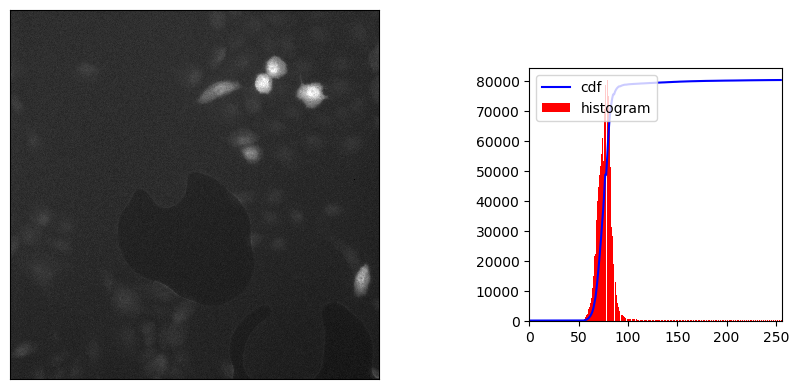

In [37]:
hist, bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max() # get the cumulative distribution function

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), dpi=100, 
                               gridspec_kw={'width_ratios': [3, 1]}) # adjust sublot ratio

ax1.imshow(img, 'gray')
ax1.get_xaxis().set_visible(False) # hide x-axis
ax1.get_yaxis().set_visible(False) # hide y-axis

ax2.plot(cdf_normalized, color = 'b')
ax2.hist(img.flatten(),256,[0,256], color = 'r')
ax2.set_xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')
# now set the histogram aspect ratio
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

#plt.subplots_adjust(right=0.5)
plt.tight_layout(1.10)
plt.show()

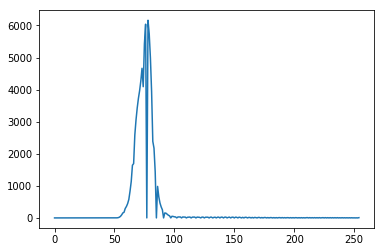

In [64]:
# find the slope of the cdf
slope = np.diff(cdf_normalized)/np.diff(bins[:-1])

fig, ax = plt.subplots()
ax.plot(slope)
plt.show()

In [74]:
# find the index of the first non-zero value of the derivative of the slope
idx = np.nonzero(np.diff(slope))[0]
print(idx[0])

38


In [89]:
# now slide the histogram over
img_adj = img+10-idx[0]

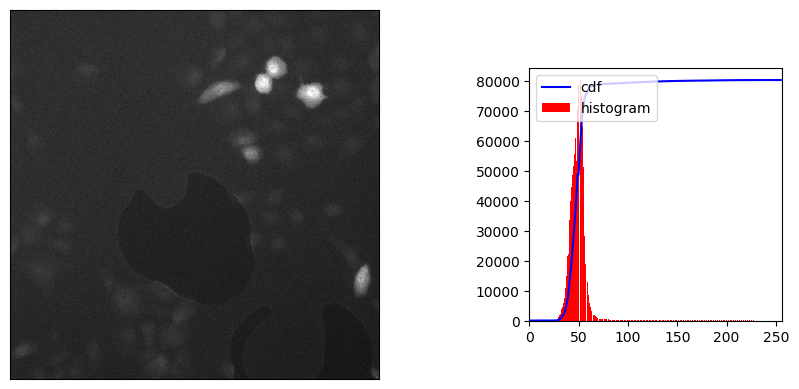

In [90]:
hist, bins = np.histogram(img_adj.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), dpi=100, 
                               gridspec_kw={'width_ratios': [3, 1]}) # adjust sublot ratio

ax1.imshow(img_adj, 'gray')
ax1.get_xaxis().set_visible(False) # hide x-axis
ax1.get_yaxis().set_visible(False) # hide y-axis

ax2.plot(cdf_normalized, color = 'b')
ax2.hist(img_adj.flatten(),256,[0,256], color = 'r')
ax2.set_xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')
# now set the histogram aspect ratio
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

#plt.subplots_adjust(right=0.5)
plt.tight_layout(1.10)
plt.show()

In [78]:
cv2.imwrite('Cellomics_images/102919-WT/good_all_channels/MFGTMP91029100002_B01f56d1_1.TIF', img_adj )

True

In [ ]:
## alternatively, adjust gamma

In [73]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [83]:
# create a CLAHE object (Arguments are optional).
#clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # set clipLimit to adj how much detail to bring up
#cl1 = clahe.apply(img)
cl1 = adjust_gamma(img, gamma=0.5)

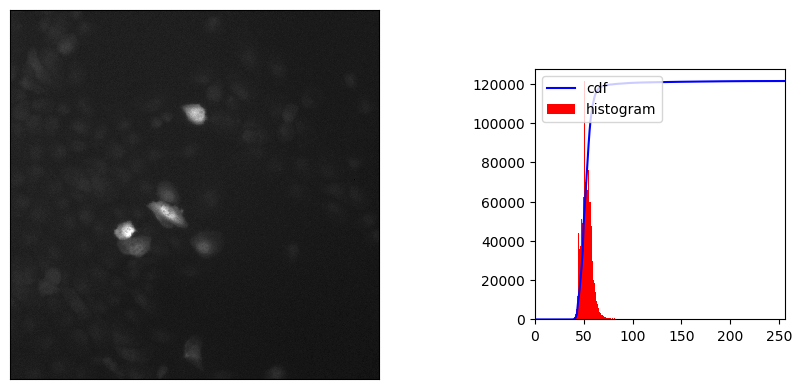

In [84]:
hist, bins = np.histogram(cl1.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), dpi=100, 
                               gridspec_kw={'width_ratios': [3, 1]}) # adjust sublot ratio

ax1.imshow(cl1, 'gray')
ax1.get_xaxis().set_visible(False) # hide x-axis
ax1.get_yaxis().set_visible(False) # hide y-axis

ax2.plot(cdf_normalized, color = 'b')
ax2.hist(cl1.flatten(),256,[0,256], color = 'r')
ax2.set_xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')
# now set the histogram aspect ratio
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

#plt.subplots_adjust(right=0.5)
plt.tight_layout(1.10)
plt.show()

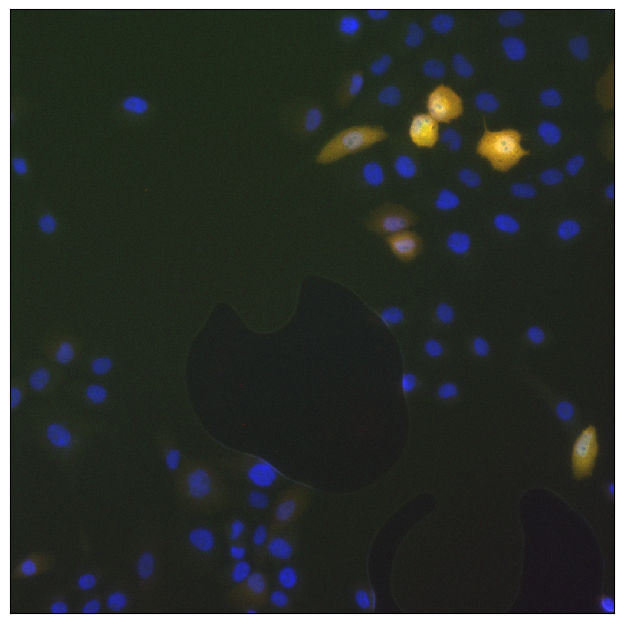

In [79]:
blue = cv2.imread('Cellomics_images/102919-WT/good_all_channels/MFGTMP91029100002_B01f56d0.TIF', 0)
green = cv2.imread('Cellomics_images/102919-WT/good_all_channels/MFGTMP91029100002_B01f56d1_1.TIF', 0)
red = cv2.imread('Cellomics_images/102919-WT/good_all_channels/MFGTMP91029100002_B01f56d2.TIF', 0)

# cv2.merge((B, G, R))
mergedImg = cv2.merge([blue, green, red])

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=100) 

# matplotlib uses RGB convention, so need to flip the channels           
ax.imshow(mergedImg[:,:,[2,1,0]])
ax.get_xaxis().set_visible(False) # hide x-axis
ax.get_yaxis().set_visible(False) # hide y-axis

plt.show()

In [80]:
cv2.imwrite('/Users/jessesnaust/Desktop/MFGTMP91029100002_B01f56_merged.TIF', mergedImg)

True